In [1]:
import yfinance as yf

# fetch stock
stock_code = 'RELIANCE.NS'
stock_quote = yf.Ticker(stock_code).info

df = yf.download(stock_code, start = '2020-01-01', end='2024-01-01')
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  1387.957031  1396.277466  1376.527954  1380.276611  1360.645142   
2020-01-02  1382.471069  1408.941040  1382.471069  1403.775024  1383.809448   
2020-01-03  1401.671997  1409.581055  1392.528687  1405.466553  1385.476807   
2020-01-06  1389.785767  1397.008911  1369.670410  1372.870605  1353.344482   
2020-01-07  1388.871338  1403.043579  1383.842529  1393.991699  1374.165283   

              Volume  
Date                  
2020-01-01   7002234  
2020-01-02   8855158  
2020-01-03  10492349  
2020-01-06  12259588  
2020-01-07   8341811  


Data analysis and visualization

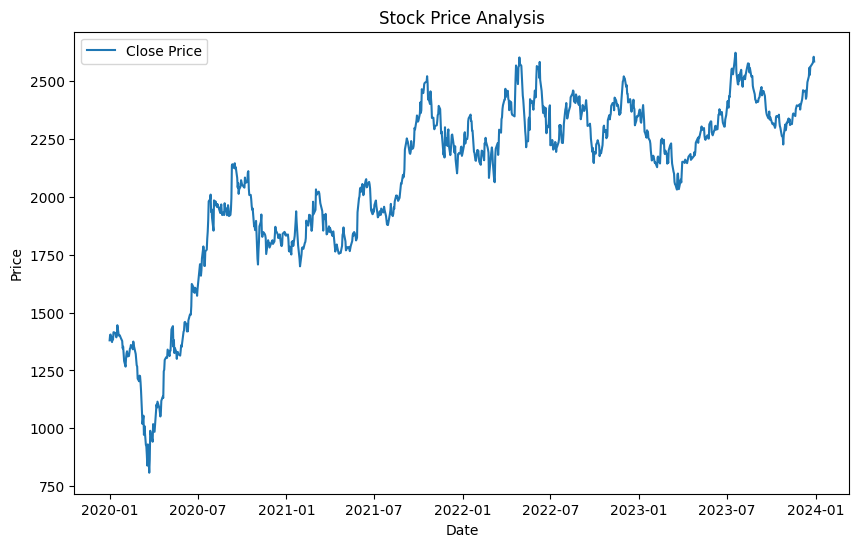

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Build a predictive model

In [6]:
import pandas as pd
from re import X
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#prepared data for modeling

df['Date'] = df.index
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['Date']]
y = df['Close']

#spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit linear regression()
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
#predict on test data
y_pred = model.predict(X_test)

#eveluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 47216.17629781339
R-squared: 0.6657822600691622


Plot Predictions

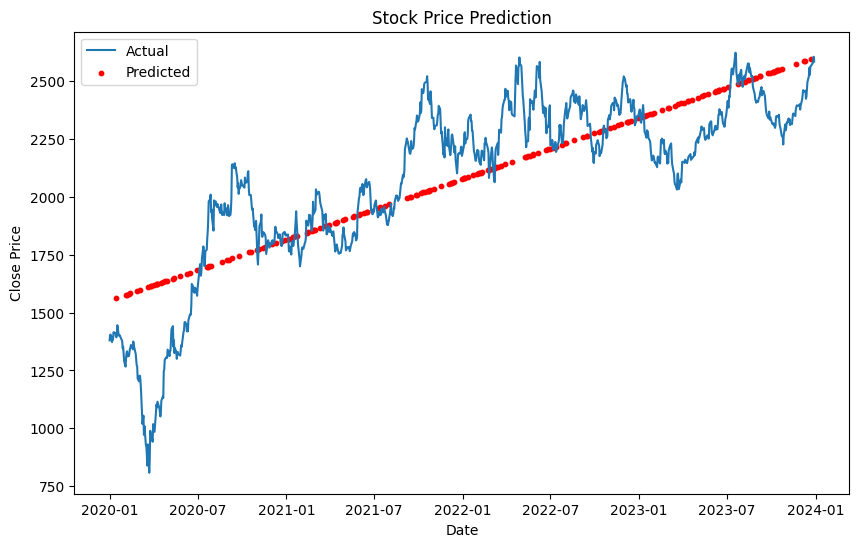

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Actual')
plt.scatter(X_test.index, y_pred, label='Predicted', color='red', s=10)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()